Primero que nada, abrimos el dataset con pandas, para poder tener un primer pantallazo y empezar a trabajar.

In [33]:
import pandas as pd

In [160]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

In [35]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


A partir de esta primera observación, podemos plantearnos algunas preguntas entender cómo determinar si una persona es de bajos o altos ingresos: ¿cómo se relacionan los parámetros del dataset con los ingresos de las personas? ¿Hay una correlación entre los ingresos y los años estudiados? ¿Entre los ingresos y la ganancia perdida?, ¿con las horas de trabajo registradas?, ¿con la edad o rol familiar?, ¿con algún otro parámetro?

In [65]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

## ¿Hay valores inválidos en el dataset?

In [6]:
print(df.astype('str').eq('-').any(0).value_counts())
print(df.astype('str').eq('').any(0).value_counts())
(df[['edad', 'horas_trabajo_registradas']] < 0).any()

False    13
dtype: int64
False    13
dtype: int64


edad                         False
horas_trabajo_registradas    False
dtype: bool

## ¿Hay missings?

In [7]:
print((df.isnull().mean() * 100).to_frame('porcentaje nulls'))

                                            porcentaje nulls
anios_estudiados                                    0.000000
barrio                                              1.790486
categoria_de_trabajo                                5.638647
edad                                                0.000000
educacion_alcanzada                                 0.000000
estado_marital                                      0.000000
ganancia_perdida_declarada_bolsa_argentina          0.000000
genero                                              0.000000
horas_trabajo_registradas                           0.000000
religion                                            0.000000
rol_familiar_registrado                             0.000000
tiene_alto_valor_adquisitivo                        0.000000
trabajo                                             5.660146


In [34]:
df['barrio'].astype('str').value_counts() # agregar categoria sin barrio

Palermo                29170
Belgrano                 643
nan                      583
San Isidro               198
Villa Urquiza            137
Recoleta                 121
La Boca                  114
Agronomia                106
Almagro                  100
Balvanera                 95
Puerto Madero             90
Caballito                 81
Boedo                     80
Barracas                  75
Chacarita                 73
Coghland                  70
Floresta                  67
Constitucion              64
Colegiales                62
Flores                    60
Liniers                   59
Monte Castro              51
Mataderos                 44
Nueva Pompeya             43
Monserrat                 37
nuñez                     34
Parque Chacabuco          31
Parque Avellaneda         29
Villa Luro                29
Parque Chas               28
La Paternal               24
Retiro                    20
Villa Soldati             19
Villa Devoto              19
Villa Real    

## ¿Hay barrios habitados mayoritariamente por personas con alto/bajo valor adquisitivo?

<Figure size 900x600 with 0 Axes>

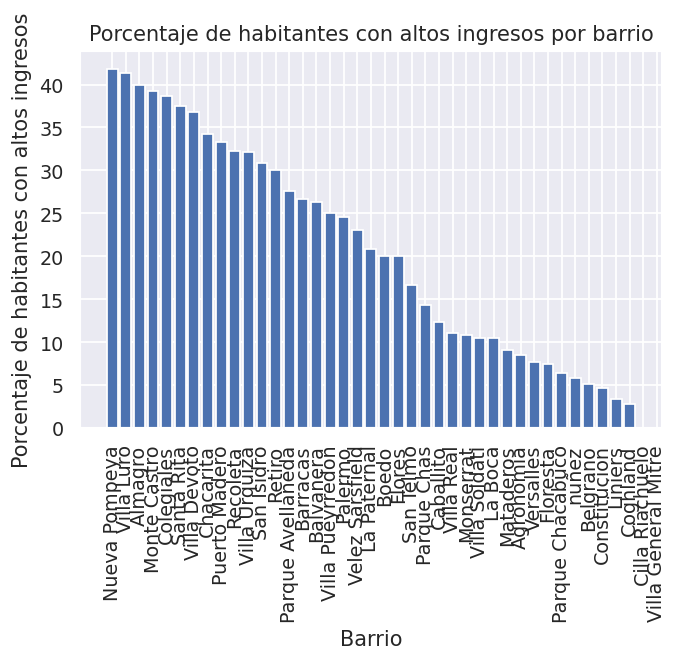

In [71]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['barrio'].value_counts() / df_total['barrio'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100) # plt.bar(y, x) 
plt.ylabel("Porcentaje de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Porcentaje de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show()

#PODRÍA SACARSE, NO TIENE SIGNIFICANCIA ESTADISTICA

Se observa que en existe un conjunto de barrios en los que menos del %15 de su poblacion es de altos ingresos. (¿podriamos ajustar mas ese limite con menos del %10 desde Mataderos? )

<Figure size 900x600 with 0 Axes>

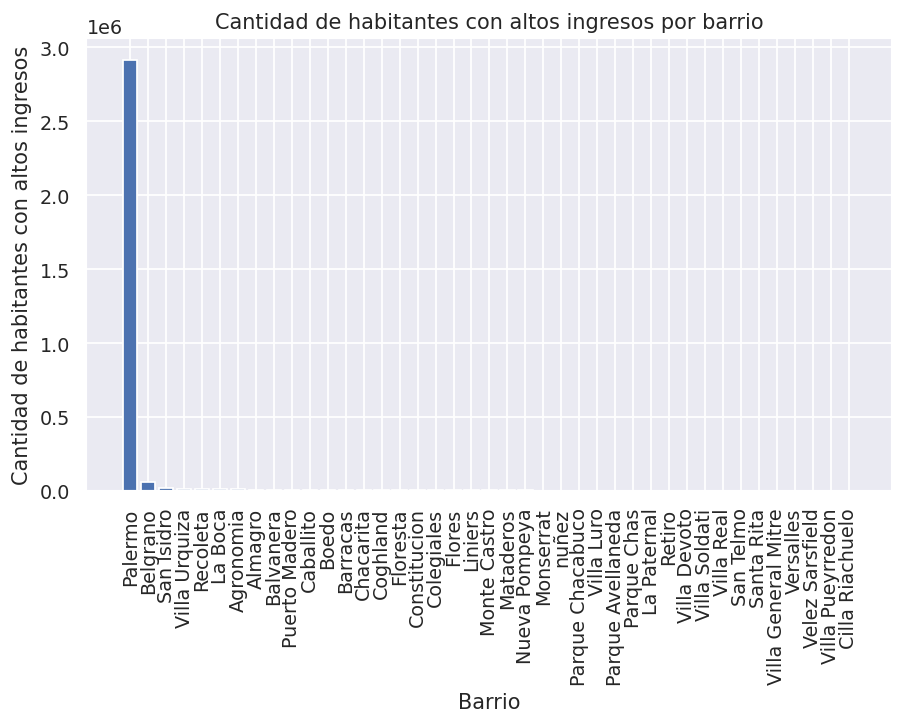

In [265]:
plt.figure(dpi=150)

df_total = df

df_r = df['barrio'].value_counts()

plt.figure(figsize=(6.4*1.3, 4.8), dpi=125)

plt.bar(df_r.index, df_r.values*100)
plt.ylabel("Cantidad de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Cantidad de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show() 

Como se puede ver en el gráfico, la cantidad de personas encuestadas son mayormente de Palermo. En el resto de barrios, hay muy pocos encuestados en relación al total y los resultados no pueden generalizarse.

El feature barrio se considerará poco útil para clasificar a los encuestados.

## ¿Hay categorias de trabajo correspondientes mayoritariamente a personas con bajo valor adquisitivo?

<Figure size 900x600 with 0 Axes>

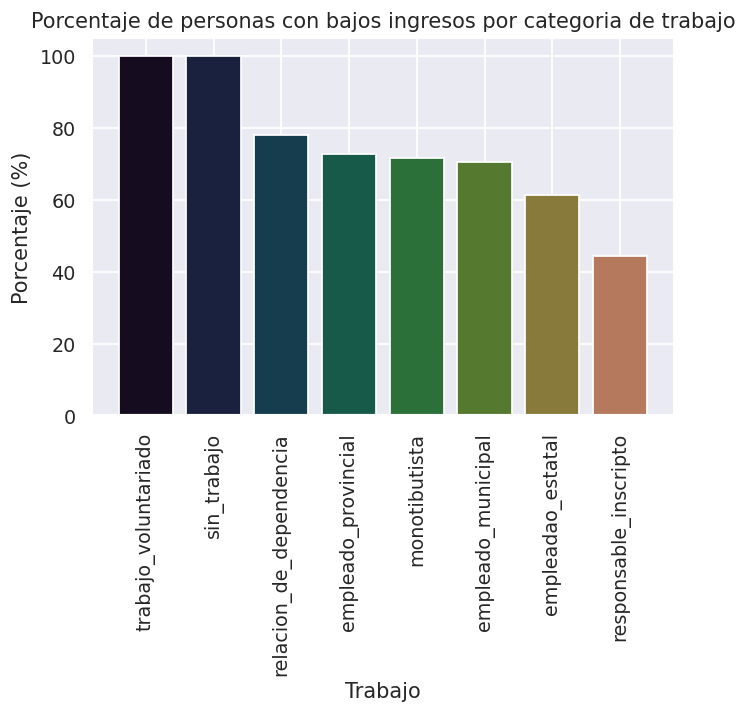

In [264]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['categoria_de_trabajo'].astype('str').value_counts() / df_total['categoria_de_trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color=sns.color_palette('cubehelix', 14))
plt.ylabel("Porcentaje (%)")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con bajos ingresos por categoria de trabajo")
plt.xticks(rotation=90)
plt.show()

#PODRÍA SACARSE, NO TIENE SIGNIFICANCIA ESTADISTICA

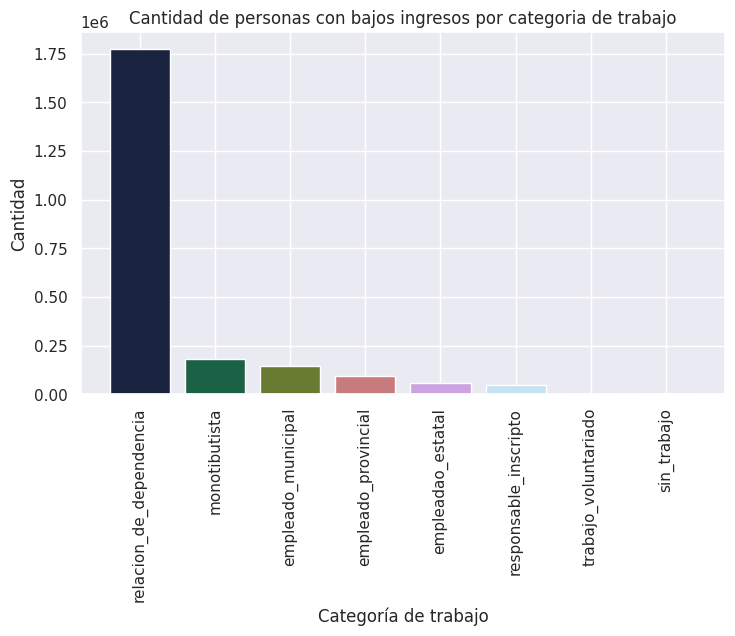

In [270]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = df_filtrado['categoria_de_trabajo'].value_counts()

plt.figure(figsize=(6.4*1.3, 4.8), dpi=100)

plt.bar(df_r.index, df_r.values*100, color=sns.color_palette('cubehelix', 6))
plt.ylabel("Cantidad")
plt.xlabel("Categoría de trabajo")
plt.title("Cantidad de personas con bajos ingresos por categoria de trabajo")
plt.xticks(rotation=90)
plt.show()

Se observa que categorias como trabajo voluntariado y desempleado son asociadas exclusivamente a personas de bajo poder adquisitivo. Sin embargo, se observa que el porcentaje de personas con estas categorias es despreciable, no es representativo.

## ¿Cómo influye la cantidad de años estudiados?

<Figure size 900x600 with 0 Axes>

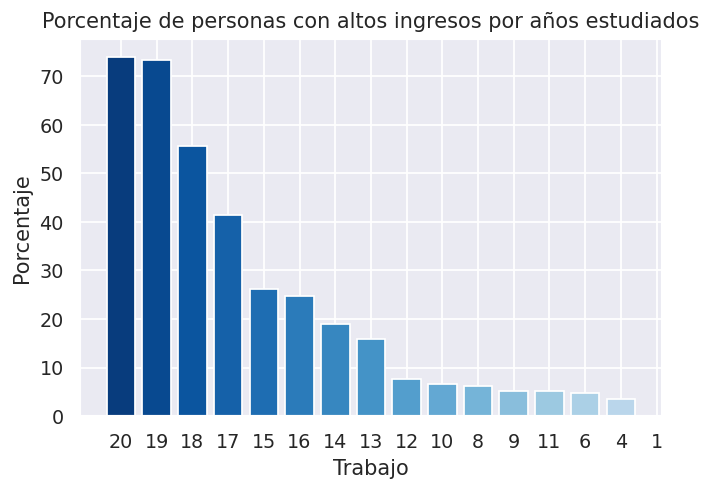

In [93]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['anios_estudiados'].value_counts() / df_total['anios_estudiados'].value_counts()) .sort_values(ascending=False) #ORDENAR POR INDEX!

plt.figure(dpi=(125))

plt.bar(df_r.index.map(str), df_r.values*100, color =sns.color_palette('Blues_r', 20))
plt.ylabel("Porcentaje")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con altos ingresos por años estudiados")
plt.show()


Se puede ver que hay una alta correlación entre los altos ingresos y la cantidad de años de estudios.

## ¿Influye la edad en el valor adquisitivo?

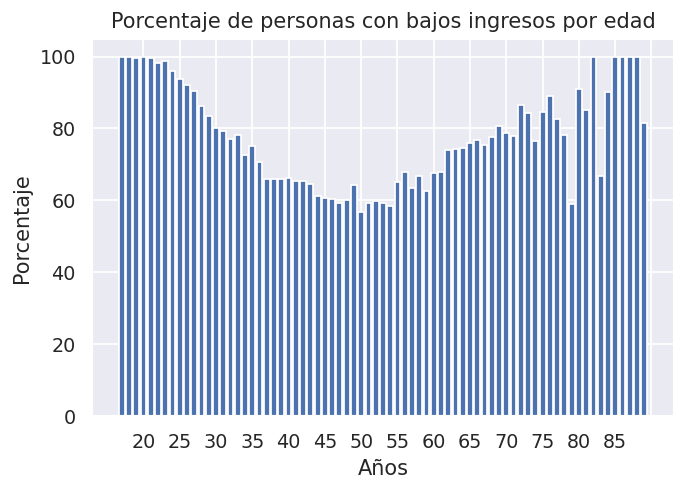

In [97]:
import numpy as np

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['edad'].value_counts() / df_total['edad'].value_counts())

plt.figure(dpi=(125))

plt.bar(df_r.index.map(str), df_r.values*100)
plt.ylabel("Porcentaje")
plt.xlabel("Años")
plt.xticks(np.arange(3, len(df_r) +1, 5.0))
plt.title("Porcentaje de personas con bajos ingresos por edad")
plt.show()

Hay una correlación entre la edad y los altos ingresos. Entre los menores de 25 años, se puede ver que un gran porcentaje no tiene altos ingresos.

## ¿Cómo se relaciona con el grado de educación alcanzada?

In [203]:
from sklearn.preprocessing import OrdinalEncoder

categorias = [
 'preescolar',
 '1-4_grado',
 '5-6_grado',
 '7-8_grado',
 '9_grado',
 '1_anio',
 '2_anio',
 '3_anio',
 '4_anio',
 '5_anio',
 'universidad_1_anio',
 'universidad_2_anio',
 'universidad_3_anio',
 'universidad_4_anio',
 'universiada_5_anio',
 'universiada_6_anio'
]
oe = OrdinalEncoder(categories= [categorias])
df[["educacion_alcanzada_encoded"]] = oe.fit_transform(df[["educacion_alcanzada"]])

df[["educacion_alcanzada", "educacion_alcanzada_encoded"]].drop_duplicates().sort_values(by="educacion_alcanzada")

,educacion_alcanzada,educacion_alcanzada_encoded
160,1-4_grado,1.0
77,1_anio,5.0
3,2_anio,6.0
415,3_anio,7.0
2,4_anio,8.0
56,5-6_grado,2.0
10,5_anio,9.0
15,7-8_grado,3.0
6,9_grado,4.0
224,preescolar,0.0


Usamos ordinal encoder para pasar la variable categórica a numérica y poder explicitar el orden.

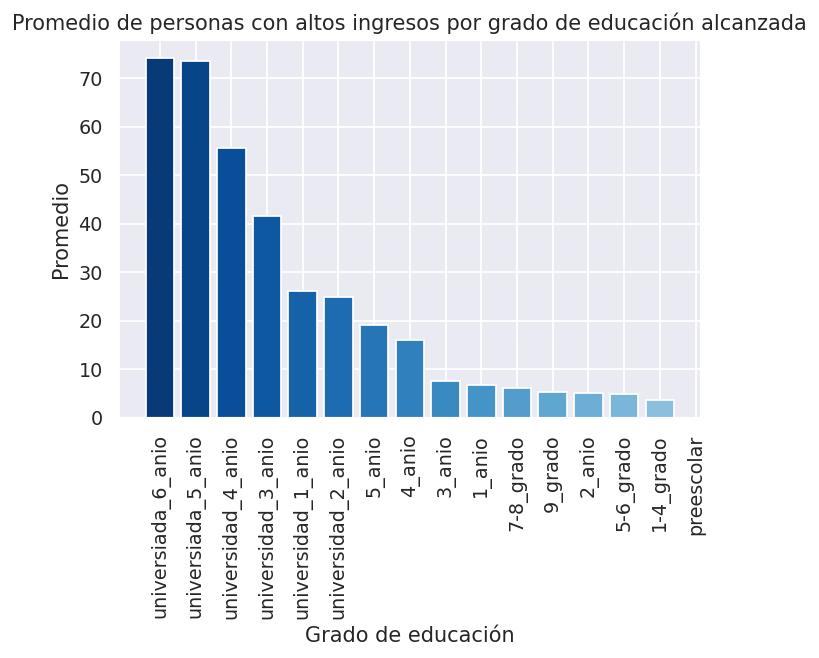

In [244]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['educacion_alcanzada'].value_counts() / df_total['educacion_alcanzada'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color =sns.color_palette('Blues_r', 25))
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

De forma similar a los años estudiados, hay una correlación entre el grado de educación alcanzada.

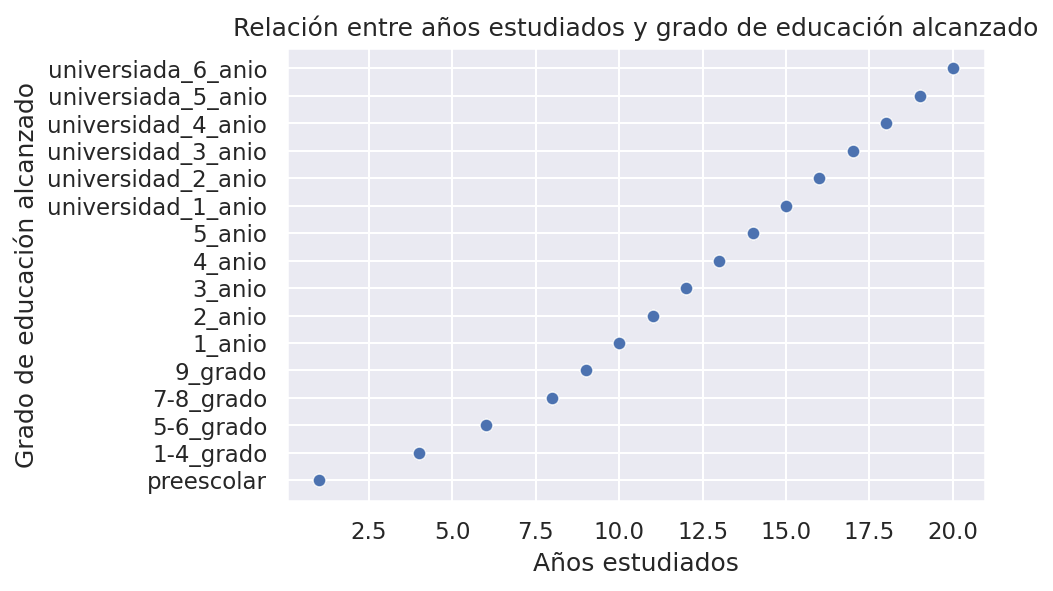

In [209]:
plt.figure(dpi=150)
sns.scatterplot(
    x='anios_estudiados',
    y='educacion_alcanzada_encoded',
    data=df,
    alpha=0.7,
)

plt.xlabel("Años estudiados")
plt.ylabel("Grado de educación alcanzado")
plt.yticks(list(range(0, len(categorias))), categorias)

plt.title('Relación entre años estudiados y grado de educación alcanzado')
plt.show()

Los features están muy correlacionados, con tomar uno solo alcanza para el análisis. El otro feature no agrega información extra.

## ¿Cómo se relaciona con el área de trabajo?

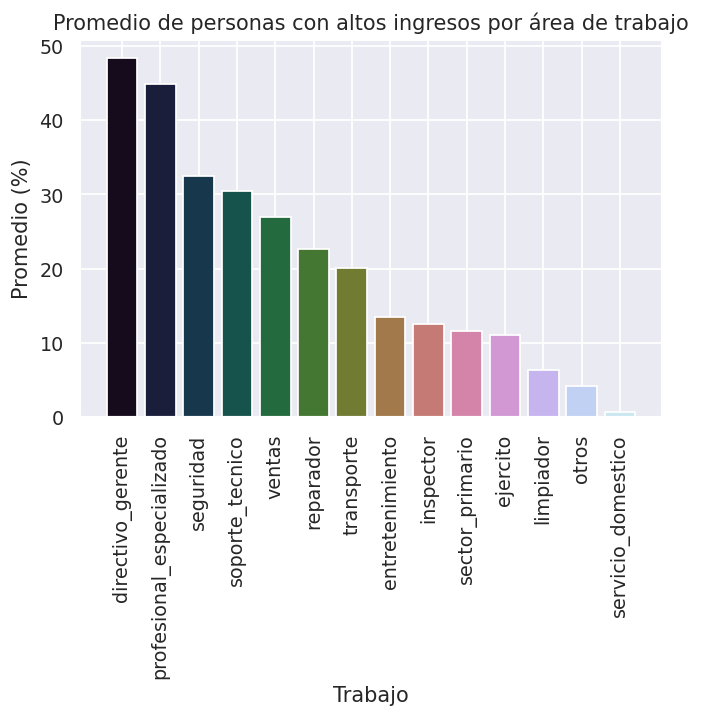

In [239]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['trabajo'].value_counts() / df_total['trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color =sns.color_palette('cubehelix', 15))
plt.ylabel("Promedio (%)")
plt.xlabel("Trabajo")
plt.title("Promedio de personas con altos ingresos por área de trabajo")
plt.xticks(rotation=90)
plt.show()

In [57]:
df['trabajo'].value_counts()

profesional_especializado    4140
reparador                    4099
directivo_gerente            4066
entretenimiento              3770
ventas                       3650
otros                        3295
inspector                    2002
transporte                   1597
limpiador                    1370
sector_primario               994
soporte_tecnico               928
seguridad                     649
servicio_domestico            149
ejercito                        9
Name: trabajo, dtype: int64

Vemos que el tipo de trabajo se puede asociar al poder adquisitivo. Los trabajos de limpiador, otros, y servicio doméstico tienen menos del 10% de trabajadores con alto poder adquisitivo.

## ¿Cómo se relaciona con las horas de trabajo registradas?

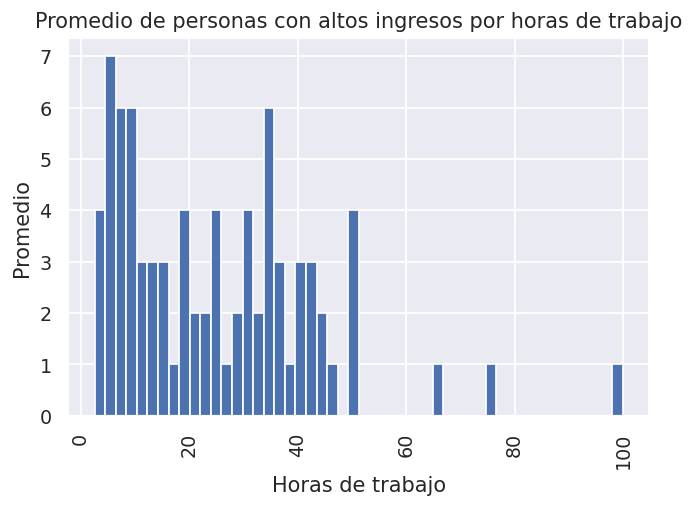

In [297]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = 100*(df_filtrado['horas_trabajo_registradas'].value_counts() / df_total['horas_trabajo_registradas'].value_counts())

plt.figure(dpi=(125))

plt.hist(df_r, bins=50)
plt.ylabel("Promedio")
plt.xlabel("Horas de trabajo")
plt.title("Promedio de personas con altos ingresos por horas de trabajo")
plt.xticks(rotation=90)
plt.show()

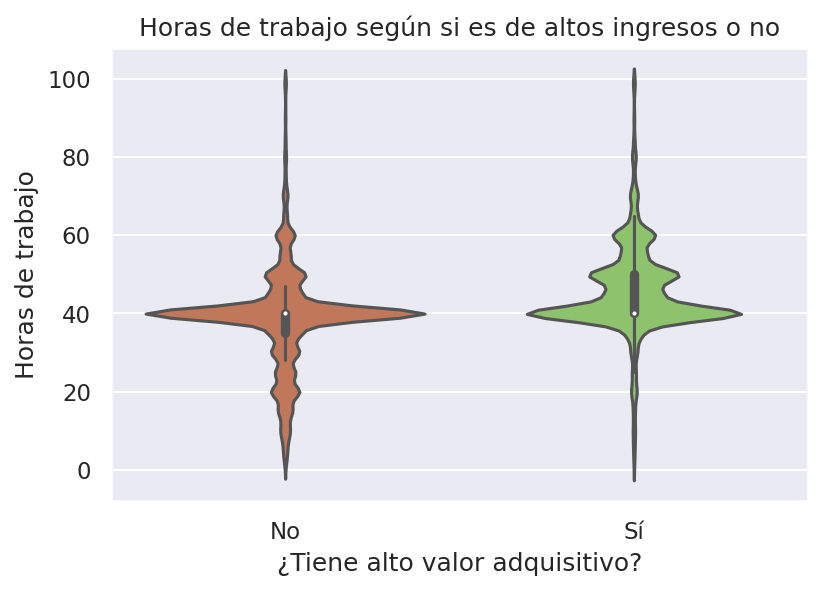

In [219]:
plt.figure(dpi=150)
plt.title("Horas de trabajo según si es de altos ingresos o no")
sns.violinplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Horas de trabajo")
plt.xlabel("¿Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

Se puede ver que la diferencia de horas de trabajo no varía significativamente entre las personas de altos y bajos ingresos. Sin embargo, aquellos con alto valor adquisivo tienden a trabajar levemente más.

## ¿Cómo se relaciona con el estado marital?

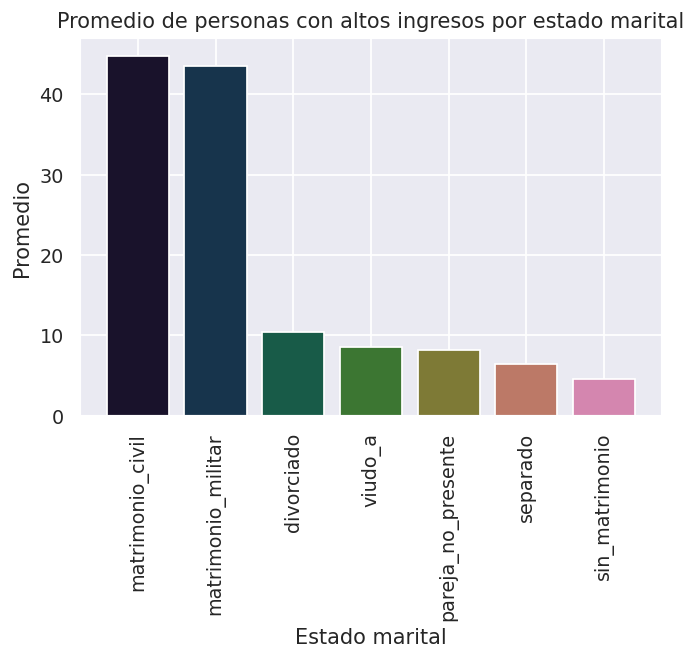

In [283]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['estado_marital'].value_counts()  / df_total['estado_marital'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color =sns.color_palette('cubehelix', 10))
plt.ylabel("Promedio")
plt.xlabel("Estado marital")
plt.title("Promedio de personas con altos ingresos por estado marital")
plt.xticks(rotation=90)
plt.show()

Se puede ver que el estado marital tiene relación con los ingresos. Para las categorías de viudo/a, pareja no presente, separado, o sin matrimonio se ve que menos del 10% de los integrantes es de altos ingresos.

## ¿Cómo se relaciona con la religión?

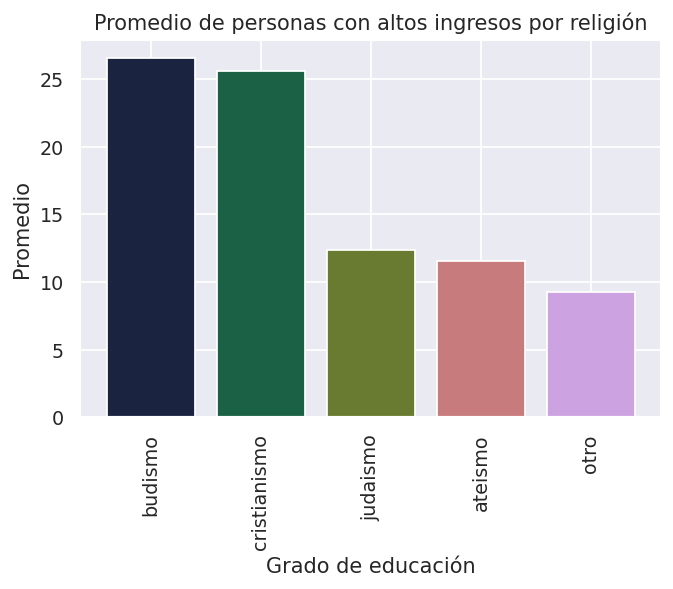

In [266]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['religion'].value_counts()  / df_total['religion'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color= sns.color_palette('cubehelix', 6))
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por religión")
plt.xticks(rotation=90)
plt.show()

# se puede ver que la religion tiene baja correlacion con los ingresos

Podemos ver que el tipo de religión no afecta significativamente a los ingresos.

## ¿Cómo se relaciona con las ganancias declaradas en la Bolsa?

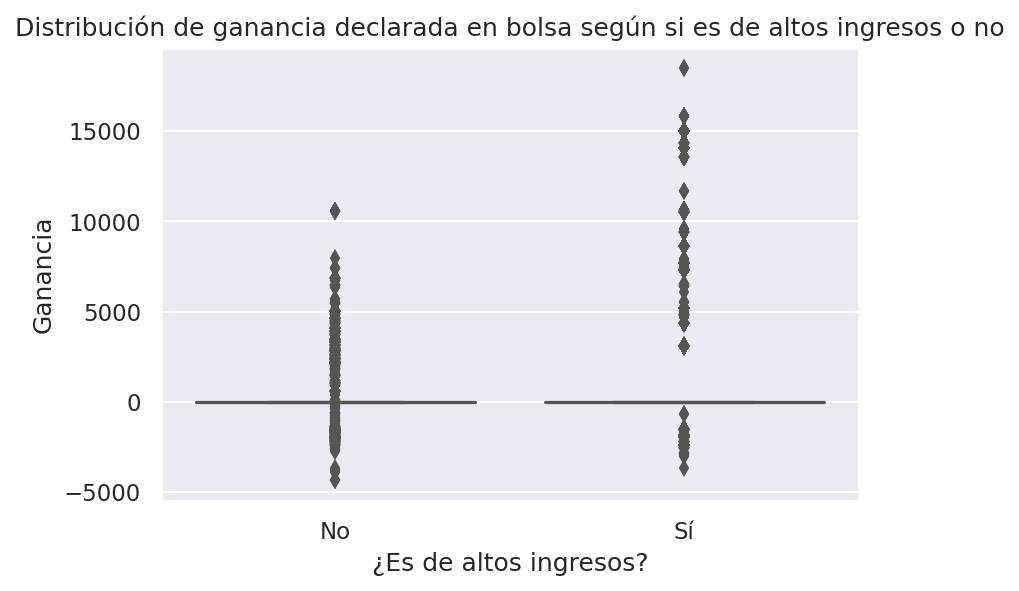

In [228]:
plt.figure(dpi=150)
plt.title("Distribución de ganancia declarada en bolsa según si es de altos ingresos o no")
sns.boxplot(
    data=df[df['ganancia_perdida_declarada_bolsa_argentina'] < 20000],
    y='ganancia_perdida_declarada_bolsa_argentina',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Ganancia")
plt.xlabel("¿Es de altos ingresos?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

Se puede ver que todos los valores de ganancias en la bolsa estan concentrados alrededor del cero tanto para altos como para bajos ingresos. Los

## ¿Cómo se relaciona con el género?

<Figure size 432x288 with 0 Axes>

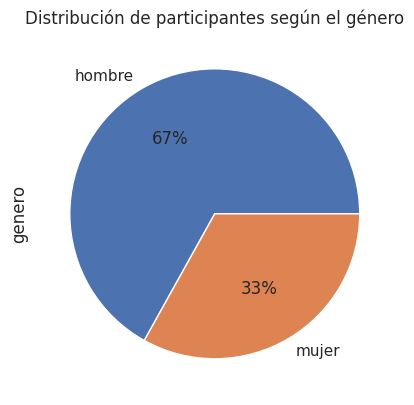

In [292]:
plt.figure()
plt.figure(figsize=(6.4*1.3, 4.8), dpi=100)
plt.title("Distribución de participantes según el género")

df_filtrado = df
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

<Figure size 432x288 with 0 Axes>

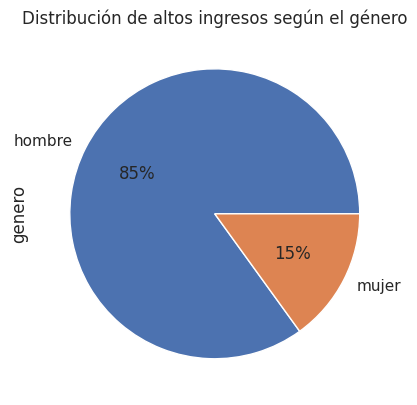

In [291]:
plt.figure()
plt.figure(figsize=(6.4*1.3, 4.8), dpi=100)
plt.title("Distribución de altos ingresos según el género")

df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

plt.show()

Se puede observar que el porcentaje de mujeres disminuye entre las personas de altos ingresos.
Si es mujer tiene menos 'chances' de ser de altos ingresos.

# Predicción

In [295]:
def baseline(df):
    df = (df['anios_estudiados'] > 15) & (df['genero'] == 'hombre') & (
        (df['rol_familiar_registrado'] != 'con_hijos') & (df['rol_familiar_registrado'] != 'sin_familia')
    ) & ( (df['trabajo'] != 'limpiador') & (df['trabajo'] != 'otros') & (df['trabajo'] != 'servicio_domestico') 
    ) & ((df['estado_marital'] == 'matrimonio_civil') | (df['estado_marital'] == 'matrimonio_militar') | (df['estado_marital'] == 'divorciado') | (df['estado_marital'] == 'viudo_a')
    ) & ((df['edad']>28))
    return list(df.astype(int))

prediccion = baseline(df)
inicial = list(df['tiene_alto_valor_adquisitivo'])

j = 0
for i in range(0,len(inicial)):
    if ((inicial[i] == prediccion[i])):
        j += 1
                
acc = 100*(j / len(inicial))
print(f'ACCURACY: {acc} %')

ACCURACY: 81.54847824084027 %
